import something

In [18]:
import crypy as cp
import numpy as np
from matplotlib import pyplot as plt
from crypy_examples.atom_network import (
    draw_atom, 
    draw_bond,
    color_bond,
    color_Se,
    color_Ta,
    r_Se,
    r_Ta,
    r_bond,
    a1,a2,
    p1,p2,p3,p4        
)
from crypy_examples.chiral_interlock import lattice_points_in_hex
from matplotlib.colors import to_rgb
from crypy_examples.colorspace import CLR_EDGE,CLR_NODE




Fundamental Parameters

In [19]:
xylim = ((-10,10),(-10,10))


In [20]:
# region class setup for figure
# region LEVEL 1: ATOMIC LATTICE
pv = cp.PrimitiveVector2D(a1,a2)
bss = cp.Basis2D(pv)
gen_atom_Ta = lambda x,y: draw_atom(x, y, radius=r_Ta*.6, color_hex=color_Ta)
gen_atom_Se = lambda x,y: draw_atom(x, y, radius=r_Se, color_hex=color_Se)
gen_bond = lambda x,y: draw_bond(x,y,r=r_bond*.6,facecolor=to_rgb(color_bond))
alpha_common = .3
def gen_cation_hexagon(x,y):
    return cp.Collection.Generator.gen_hexagon(
        x=x,y=y,r = 1/3,alpha=alpha_common,c=CLR_NODE[1]
        )
def gen_anion_hexagon(x,y):
    return cp.Collection.Generator.gen_hexagon(
        x=x,y=y,r = 1/3,alpha=alpha_common,c=CLR_NODE[0]
        )
def gen_cation_triangle(x,y):
    return cp.Collection.Generator.gen_regular_polygon(
        3,x=x,y=y,r = 1/np.sqrt(3),alpha=alpha_common,
        c=CLR_NODE[1],phi=-np.pi/6
        )
def gen_anion_triangle(x,y):
    return cp.Collection.Generator.gen_regular_polygon(
        3,x=x,y=y,r = 1/np.sqrt(3),alpha=alpha_common,
        c=CLR_NODE[0],phi=np.pi/6
        )
# gen_triangle = lambda x,y: cp.Collection.Generator.gen_regular_polygon(3,x=x,y=y,r = 1)

print("color_bond rgb:",to_rgb(color_bond))
bss.add_artist(gen_bond,(p1,p2),label = 'bond1')
bss.add_artist(gen_bond,(p1,p3),label = 'bond2')
bss.add_artist(gen_bond,(p2,p4),label = 'bond3')
bss.add_artist(gen_atom_Ta,(p1),label='Ta')
bss.add_artist(gen_atom_Se,(p2),label='Se')
# bss.add_artist(gen_cation_hexagon,(p1),label='cation_hexagon')
# bss.add_artist(gen_anion_hexagon,(p2),label='anion_hexagon')
# bss.add_artist(gen_cation_triangle,(p1),label='cation_triangle')
# bss.add_artist(gen_anion_triangle,(p2),label='anion_triangle')

# bss.add_artist(gen_triangle,(p2),label='triangle')

lp = cp.LatticePoints2D(pv) 
lp.generate_points_by_xylim(*xylim)
cry = cp.Crystal2D(bss,lp)
# endregion



# region LEVEL 2: CDW 
pv_sup = pv.get_super_structure(3,3)
bss_sup = cp.Basis2D(pv_sup)
gen_CDW = lambda xxx,yyy: plt.fill(xxx,yyy,"y",alpha=.3)
cdw_p1 = np.array((2/3,1/3))
cdw_p2 = np.array((-1/3,1/3))
cdw_p3 = np.array((-1/3,-2/3))
cdw_ps = np.array((cdw_p1,cdw_p2,cdw_p3)) + np.array((1/3,0)).reshape(1,2)

bss_sup.add_artist(gen_CDW,cdw_ps,label='CDW')
lp_sup = cp.LatticePoints2D(pv_sup)   
lp_sup.generate_points_by_xylim(*xylim)
cry_sup = cp.Crystal2D(bss_sup,lp_sup)
gen_domain = lambda x,y:cry_sup.plot_crystal(x,y)
# endregion
# endregion

# region plot

color_bond rgb: (0.8784313725490196, 0.8784313725490196, 0.8784313725490196)


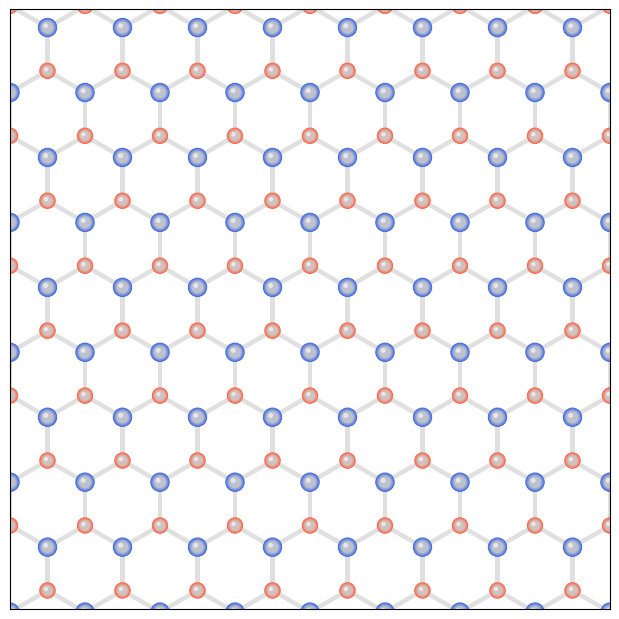

In [22]:
plt.figure(figsize=(6,6))
fig,ax  = cry.plot_crystal()

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_xticks([])
ax.set_yticks([])
ax.set_position([0,0,1,1])
# plt.savefig(
#     "assets/lattice_catan_tri.png",
#     dpi=200,bbox_inches='tight',pad_inches=0)
plt.savefig(
    "D02_lattice_v0.0.1_Ta_visible.svg",
    bbox_inches='tight', pad_inches=0)
